In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


#data augmentation 
#random flip - flips input images horizontally randomly
#random rotation - randomly rotates images by a fraction of 0.1 radians
#random zoon - randomly zooms input images by a factor of 0.1
# Usig the data augmentation to the base model and compare the result with and without data augmentation

cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
#batch normalization
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)

batch_size = 32
img_height = 32
img_width = 32
epochs = 10
bn_model_aa = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (7,7), strides=(1,1),padding='valid', activation=None), #(7x7) kernal size
  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.ReLU(),  # activation function
  layers.MaxPooling2D((2,2), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(32, (5,5), strides=(1,1), padding='same', activation=None), #same padding -> pad in a way to keep output dim same as input dim
  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.ReLU(),  # activation function
  layers.MaxPooling2D((2,2), strides=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
])

bn_model_aa.summary()
# Recomplie and retrain model
bn_model_aa.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_aa = bn_model_aa.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

# # Evaluate the model

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/Users/jon/Documents/CNN/tenserflow_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,876 (687.02 KB)

 Trainable params: 175,780 (686.64 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/10
1563/1563 - 48s - 31ms/step - accuracy: 0.1231 - loss: 3.7879 - val_accuracy: 0.1615 - val_loss: 3.5471
Epoch 2/10
1563/1563 - 50s - 32ms/step - accuracy: 0.2282 - loss: 3.1722 - val_accuracy: 0.2352 - val_loss: 3.1432
Epoch 3/10
1563/1563 - 50s - 32ms/step - accuracy: 0.2739 - loss: 2.9164 - val_accuracy: 0.2047 - val_loss: 3.3934
Epoch 4/10
1563/1563 - 60s - 39ms/step - accuracy: 0.3062 - loss: 2.7631 - val_accuracy: 0.2869 - val_loss: 2.8839
Epoch 5/10
1563/1563 - 63s - 40ms/step - accuracy: 0.3269 - loss: 2.6565 - val_accuracy: 0.2808 - val_loss: 2.9050
Epoch 6/10
1563/1563 - 52s - 33ms/step - accuracy: 0.3476 - loss: 2.5662 - val_accuracy: 0.3140 - val_loss: 2.7273
Epoch 7/10
1563/1563 - 33s - 21ms/step - accuracy: 0.3607 - loss: 2.4965 - val_accuracy: 0.3179 - val_loss: 2.8127
Epoch 8/10
1563/1563 - 34s - 22ms/step - accuracy: 0.3774 - loss: 2.4369 - val_accuracy: 0.3201 - val_loss: 2.7277
Epoch 9/10
1563/1563 - 34s - 22ms/step - accuracy: 0.3853 - loss: 2.3832 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3542 - loss: 2.5756
Test Accuracy: 0.35440000891685486


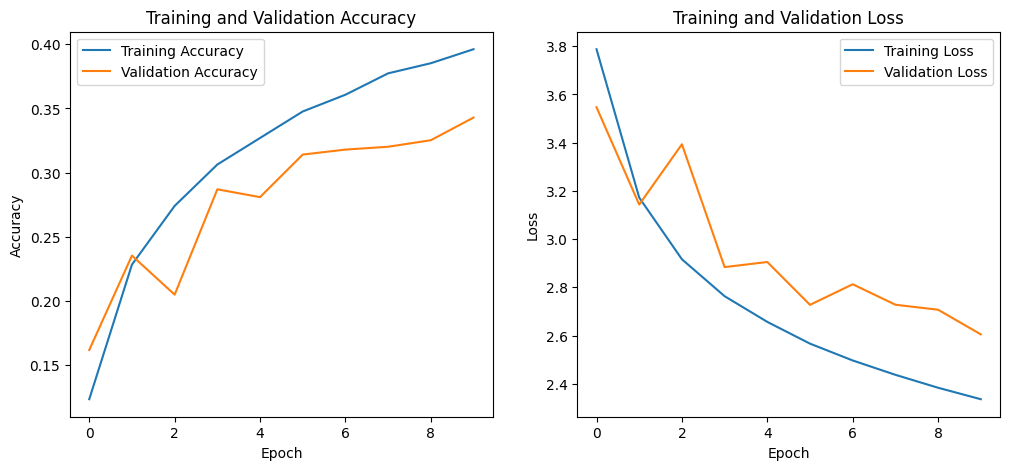

In [4]:
#accuracy is 0.59
# Evaluate the model
test_loss, test_accuracy = bn_model_aa.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_aa.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_aa.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_aa.history['loss'], label='Training Loss')
plt.plot(history_bn_model_aa.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()